### Required Libraries are imported:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


### Fetch train and test data from input files

In [2]:
df_train = pd.read_csv('train.dat',sep=" ",header = None)
df_train = df_train.rename(columns={0: 'Year', 1: 'Population'})
arr_year = df_train['Year'].to_numpy().reshape(-1,1)
arr_population = df_train['Population'].to_numpy().reshape(-1,1)
df_test = pd.read_csv('test.dat',sep=" ",header = None) 
df_test = df_test.rename(columns={0: 'Year', 1: 'Population'})
test_arr_year = df_test['Year'].to_numpy().reshape(-1,1)
test_arr_population = df_test['Population'].to_numpy().reshape(-1,1)

### Load train & test data and split into features and target variable, creating kf variable for k-fold validation

In [3]:
 
X = arr_year
y = arr_population

X_test = test_arr_year
y_test = test_arr_population

kf = KFold(n_splits = 6)

### Average RMSE calculation

In [4]:
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 

e = math.e 
alphas = [0, e ** -25, e ** -20, e ** -14, e ** -7, e ** -3, 1, e ** 3, e **7]
rmse_list = []
avg_rmse_list = []

rmse_list_train = []
avg_rmse_list_train = []
for degree in degrees:
    rmse_scores = []
    avg_rmse = 0
    
    rmse_scores_train = []
    avg_rmse_train = 0
  
    for train_index, val_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_Val = X[train_index], X[val_index]
        y_train, y_Val = y[train_index], y[val_index]
        
        # Standardize the Input Feature and Target Variable
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_Val_scaled = scaler.transform(X_Val)
        
        y_train_scaled = scaler.transform(y_train)
        y_Val_scaled = scaler.transform(y_Val)
        
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_Val_poly = poly.transform(X_Val_scaled)
        
        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train_scaled)

        # Make predictions on the Validation test set
        y_pred_Val = model.predict(X_Val_poly)
        y_pred_Val_inv = scaler.inverse_transform(y_pred_Val)
        
        # Make predictions on the Train set
        y_pred_train = model.predict(X_train_poly)
        y_pred_train_inv = scaler.inverse_transform(y_pred_train)

        # Calculate the RMSE score for this fold
        rmse = np.sqrt(mean_squared_error(y_Val, y_pred_Val_inv))
        rmse_scores.append(rmse)
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_inv))
        rmse_scores_train.append(rmse_train)
        
        # Add the RMSE score to the average
        avg_rmse += rmse
        avg_rmse_train += rmse_train

    #these are the errorson the Val set of the training data
    avg_rmse /= 6
    rmse_list.append(rmse_scores)
    avg_rmse_list.append(avg_rmse)
    
    avg_rmse_train /= 6
    rmse_list_train.append(rmse_scores_train)
    avg_rmse_list_train.append(avg_rmse_train)

In [5]:
avg_rmse_list

[1.0155605589710903,
 1.0835561617376517,
 0.775429312351389,
 0.783001685381381,
 0.4934818442564542,
 0.5701350133901181,
 0.14235262539341406,
 0.18750847543431556,
 0.14631007436529722,
 0.23647291096697423,
 0.1648808000316062,
 0.6257835760348929,
 0.6869783309072318]

###  finding degree with the minimum avg_rsme.


In [6]:
min(range(len(avg_rmse_list)), key=lambda x : avg_rmse_list[x])

6

### Plotting Graph1 - Avg RMSE vs. Degrees

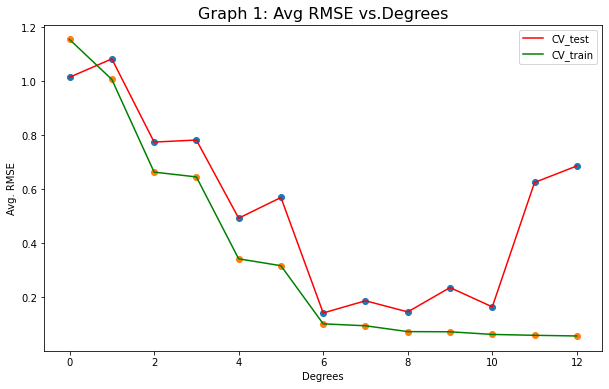

In [7]:
plt.figure(figsize=(10, 6))   
plt.title("Graph 1: Avg RMSE vs.Degrees", size=16)
plt.scatter(degrees, avg_rmse_list)
plt.plot(degrees, avg_rmse_list, c="red", label='CV_test')
plt.scatter(degrees, avg_rmse_list_train)
plt.plot(degrees, avg_rmse_list_train, c="green", label='CV_train')
plt.ylabel("Avg. RMSE")
plt.xlabel("Degrees")
location = 0
plt.legend()
plt.show()

### Ridge Regression

In [8]:
rmse_list = []
avg_rmse_list = []

rmse_list_train = []
avg_rmse_list_train = []
for alpha in alphas:
    rmse_scores = []
    avg_rmse = 0
    
    rmse_scores_train = []
    avg_rmse_train = 0
  
    for train_index, val_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_Val = X[train_index], X[val_index]
        y_train, y_Val = y[train_index], y[val_index]
        
        # Standardize the Input Feature and Target Variable
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_Val_scaled = scaler.transform(X_Val)
        
        y_train_scaled = scaler.transform(y_train)
        y_Val_scaled = scaler.transform(y_Val)
        
        # Create polynomial features
        poly = PolynomialFeatures(degree=12)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_Val_poly = poly.transform(X_Val_scaled)
        
        # Fit a linear regression model
        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train_scaled)

        # Make predictions on the Validation test set
        y_pred_Val = model.predict(X_Val_poly)
        y_pred_Val_inv = scaler.inverse_transform(y_pred_Val)
        
        # Make predictions on the Train set
        y_pred_train = model.predict(X_train_poly)
        y_pred_train_inv = scaler.inverse_transform(y_pred_train)

        # Calculate the RMSE score for this fold
        rmse = np.sqrt(mean_squared_error(y_Val, y_pred_Val_inv))
        rmse_scores.append(rmse)
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_inv))
        rmse_scores_train.append(rmse_train)
        
        # Add the RMSE score to the average
        avg_rmse += rmse
        avg_rmse_train += rmse_train

    #these are the errorson the Val set of the training data
    avg_rmse /= 6
    rmse_list.append(rmse_scores)
    avg_rmse_list.append(avg_rmse)
    
    avg_rmse_train /= 6
    rmse_list_train.append(rmse_scores_train)
    avg_rmse_list_train.append(avg_rmse_train)

In [9]:
rmse_list

[[0.08057649187788407,
  0.0896640209339916,
  0.06534927635710233,
  0.12007313092893848,
  3.67001955376365,
  0.09618751158198205],
 [0.08057648905085303,
  0.0896640211855899,
  0.06534927331140948,
  0.12007313419518717,
  3.670019537316642,
  0.0961875118663995],
 [0.08057606658950488,
  0.08966405897594396,
  0.06534882066697106,
  0.12007361432685923,
  3.670019568168597,
  0.09618755503805225],
 [0.08040577416526914,
  0.08967943465504878,
  0.06516601520918598,
  0.12026731944940183,
  3.6700237850494895,
  0.09620507257105226],
 [0.06627252951149519,
  0.10330834861686736,
  0.03661534615900436,
  0.1646016246642534,
  2.7448071963761396,
  0.10831352358322838],
 [0.08658353022264992,
  0.16092289466105603,
  0.12052173112845768,
  0.27725869992079727,
  0.3964691293859706,
  0.1521120979644821],
 [0.36389459089637205,
  0.2787539094555706,
  0.2325449124380276,
  0.4580192155622503,
  1.4149238395468078,
  0.33567749781551387],
 [0.6070918307485601,
  0.42407761955877377,
 

In [10]:
avg_rmse_list

[0.686978330907258,
 0.6869783278210136,
 0.6869782806276548,
 0.6869579001832413,
 0.5373197614851647,
 0.19897801388056893,
 0.513968994285757,
 0.5018676744502778,
 1.069071024810183]

### Plotting graph 2 Avg RMSE vs λ

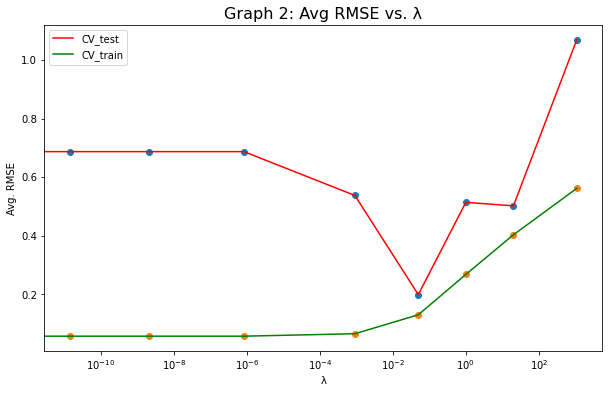

In [11]:
plt.figure(figsize=(10, 6))   #plotting questions?
plt.title("Graph 2: Avg RMSE vs. λ", size=16)

plt.scatter(alphas, avg_rmse_list)
plt.plot(alphas, avg_rmse_list, c="red", label='CV_test')

plt.scatter(alphas, avg_rmse_list_train)
plt.plot(alphas, avg_rmse_list_train, c="green", label='CV_train')

plt.ylabel("Avg. RMSE")
plt.xlabel("λ")

plt.xscale('log')

location = 0
plt.legend()
plt.show()

In [12]:
# print the index of alpha with the minimum avg_rsme.
min(range(len(avg_rmse_list)), key=lambda x : avg_rmse_list[x])

5

### Training the model on train.dat using d*=6 and predict on train.dat 

In [13]:
# Standardize the Input Feature and Target Variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
y_train_scaled = scaler.transform(y)

# Create polynomial features
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train_scaled)

# Fit a linear regression model
model_optD = Ridge(alpha=0)
model_optD.fit(X_train_poly, y_train_scaled)

# Make predictions on the train.dat and test.dat set
y_pred_train = model_optD.predict(X_train_poly)
y_pred_train_inv = scaler.inverse_transform(y_pred_train)

rmse_train = np.sqrt(mean_squared_error(y, y_pred_train_inv))

#test.dat set
X_test_scaled = scaler.transform(X_test)
y_test_scaled = scaler.transform(y_test)

X_test_poly = poly.transform(X_test_scaled)

y_pred_test = model_optD.predict(X_test_poly)
y_pred_test_inv = scaler.inverse_transform(y_pred_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_inv))


In [14]:
rmse_train

0.10540106673271309

In [15]:
rmse_test

0.11432570919476574

In [16]:
model_optD.coef_[0:]

array([[ 0.        ,  0.02770501,  0.26189729,  0.01058892, -0.22895198,
         0.00065375,  0.04178481]])

In [17]:
train_dict = {}

# iterate through the training feature array and predicted output array
for i in range(df_train['Year'].shape[0]):
    # get the training feature values for this row
    features = df_train['Year'][i]
    # get the predicted output value for this row
    output = y_pred_train_inv[i][0]
    # add this row's feature and output values to the dictionary
    train_dict[features] = output
    
train_dict = dict(sorted(train_dict.items()))
print(train_dict)

{1970: 61.9301602109299, 1971: 62.313305260093784, 1973: 63.31169403065678, 1974: 63.846422934429256, 1975: 64.36456562661374, 1976: 64.84469346786409, 1977: 65.27143763466779, 1978: 65.63473258247404, 1979: 65.92909876796557, 1980: 66.15296463045934, 1981: 66.30802783245485, 1982: 66.3986557593114, 1984: 66.4141017554166, 1986: 66.26732847249286, 1987: 66.15771273333326, 1988: 66.03730484485686, 1989: 65.91567201113548, 1991: 65.70318940258176, 1992: 65.62696386913899, 1993: 65.57838731449192, 1994: 65.56139309974219, 1996: 65.6300792633615, 1997: 65.71571013493121, 1998: 65.83284236544046, 1999: 65.97754718491228, 2000: 66.14448785309696, 2001: 66.32706608277863, 2002: 66.51760772221382, 2003: 66.70758769671352, 2004: 66.88789420935973, 2005: 67.04913220086087, 2006: 67.18196606854622, 2007: 67.27750164449503, 2008: 67.32770743281003, 2012: 66.97168336719278, 2014: 66.46023904043818, 2015: 66.14731642830861, 2017: 65.50157246873277, 2018: 65.22631739297799, 2019: 65.03409468433802, 2

### Plotting graph 3 using d*

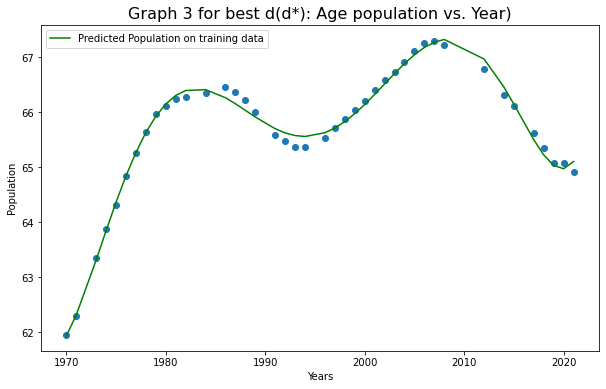

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Graph 3 for best d(d*): Age population vs. Year)", size=16)
plt.scatter(arr_year, arr_population)
plt.plot(np.array(list(train_dict.keys())), np.array(list(train_dict.values())), c="green", label="Predicted Population on training data")
plt.ylabel("Population")
plt.xlabel("Years")
location = 0
plt.legend()
plt.show()

In [19]:
# Standardize the Input Feature and Target Variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
y_train_scaled = scaler.transform(y)

# Create polynomial features
poly = PolynomialFeatures(degree=12)
X_train_poly = poly.fit_transform(X_train_scaled)

# Fit a linear regression model
model_optL = Ridge(alpha=e**-3)
model_optL.fit(X_train_poly, y_train_scaled)

# Make predictions on the test.dat set
y_pred_train_l = model_optL.predict(X_train_poly)
y_pred_train_inv_l = scaler.inverse_transform(y_pred_train_l)

rmse_train_l = np.sqrt(mean_squared_error(y, y_pred_train_inv_l))

#test.dat set
X_test_scaled = scaler.transform(X_test)
y_test_scaled = scaler.transform(y_test)

X_test_poly = poly.transform(X_test_scaled)

y_pred_test_l = model_optL.predict(X_test_poly)
y_pred_test_inv_l = scaler.inverse_transform(y_pred_test_l)

rmse_test_l = np.sqrt(mean_squared_error(y_test, y_pred_test_inv_l))

In [20]:
rmse_train_l

0.12755963811588483

In [21]:
rmse_test_l

0.12863909044517383

In [22]:
model_optL.coef_

array([[ 0.00000000e+00,  3.10354670e-02,  1.89229715e-01,
         6.44582979e-03, -7.92323648e-02, -3.00615259e-04,
        -6.47732564e-02,  1.09511371e-03,  1.82647791e-02,
        -4.68465147e-05,  7.10722790e-03, -5.21040252e-06,
        -2.03791326e-03]])

In [23]:
train_dict_l = {}

# iterate through the training feature array and predicted output array
for i in range(df_train['Year'].shape[0]):
    # get the training feature values for this row
    features = df_train['Year'][i]
    # get the predicted output value for this row
    output = y_pred_train_inv[i][0]
    # add this row's feature and output values to the dictionary
    train_dict_l[features] = output
    
train_dict_l = dict(sorted(train_dict_l.items()))
print(train_dict_l)

{1970: 61.9301602109299, 1971: 62.313305260093784, 1973: 63.31169403065678, 1974: 63.846422934429256, 1975: 64.36456562661374, 1976: 64.84469346786409, 1977: 65.27143763466779, 1978: 65.63473258247404, 1979: 65.92909876796557, 1980: 66.15296463045934, 1981: 66.30802783245485, 1982: 66.3986557593114, 1984: 66.4141017554166, 1986: 66.26732847249286, 1987: 66.15771273333326, 1988: 66.03730484485686, 1989: 65.91567201113548, 1991: 65.70318940258176, 1992: 65.62696386913899, 1993: 65.57838731449192, 1994: 65.56139309974219, 1996: 65.6300792633615, 1997: 65.71571013493121, 1998: 65.83284236544046, 1999: 65.97754718491228, 2000: 66.14448785309696, 2001: 66.32706608277863, 2002: 66.51760772221382, 2003: 66.70758769671352, 2004: 66.88789420935973, 2005: 67.04913220086087, 2006: 67.18196606854622, 2007: 67.27750164449503, 2008: 67.32770743281003, 2012: 66.97168336719278, 2014: 66.46023904043818, 2015: 66.14731642830861, 2017: 65.50157246873277, 2018: 65.22631739297799, 2019: 65.03409468433802, 2

### Plotting graph 4 using λ*

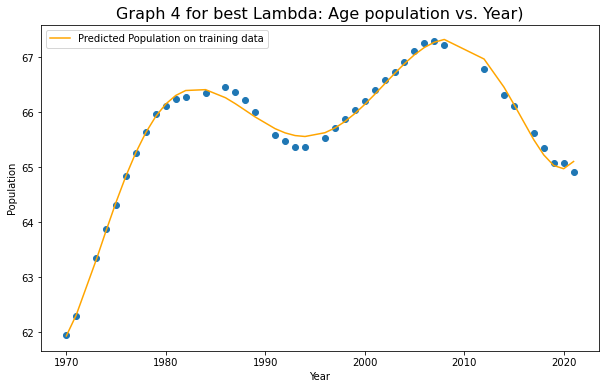

In [24]:
plt.figure(figsize=(10, 6))
plt.title("Graph 4 for best Lambda: Age population vs. Year)", size=16)
plt.scatter(arr_year, arr_population)

plt.plot(np.array(list(train_dict_l.keys())), np.array(list(train_dict_l.values())), c="orange", label="Predicted Population on training data")
plt.ylabel("Population")
plt.xlabel("Year")
location = 0
plt.legend()
plt.show()